<a href="https://colab.research.google.com/github/ArySuby/ProyectoDSParte1_SUBY/blob/main/Proyecto_CoderHouse_Suby_Relaci%C3%B3n_Largo_Peso_Merluza_argentina_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La temática de los datos se centra en analizar la relación largo – peso de la merluza común argentina, uno de los recursos pesqueros mas importantes del país. Los datos fueron recolectados por personal científico capacitado, en siete campañas de investigación durante los años 2017, 2018, 2019, 2022, 2023 y 2024 (2).
Se utilizarán los campos largo (en centímetros) y peso (en gramos) para obtener la relación para esta especie. Además, se analizará como varían estos campos con respecto a la campaña de investigación, sexo, stock reproductivo (Sur de 41°S o Norte de 41°S), y al estadio reproductivo (también llamado estadio gonadal). Los datos necesarios para este análisis se encuentran disponibles en el dataset proporcionado, que incluye fecha de campaña, numero de lance, numero de ejemplar, sexo, largo, peso, estadio de madurez gonadal (escala 1 a 5, donde: 1- Juvenil, 2-Maduración, 3- Desovante/Fluyente, 4- Postdesovante/Evacuado, y 5- Reposo).
Este análisis es importante para encontrar, si existe, una relación entre el largo y el peso de la merluza argentina. Si existiera una relación, con cualquiera de estos dos parámetros medibles se puede obtener el otro por despeje en formula (ahorrando mucho tiempo de trabajo). También se busca encontrar errores obtenidos en la obtención de los datos en cada submuestra (algo frecuente), identificado por puntos atípicos o outliers, y patrones relacionados a estadios reproductivos en cada uno de los stocks.

Hipótesis:
1)	La relación largo – peso varia con el sexo, ya que las hembras alcanzan mayor tamaño que los machos.

2)	La relación largo – peso no cambia según posición geográfica (Stock Norte/Stock Sur).

3)	El porcentaje de ejemplares de merluza en estadio reproductivo activo (es decir Desovante/Fluyente o Estadio 3) es mayor en las campañas de verano (pico de reproducción de la especie) que en las campañas de invierno.


In [2]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import scipy
from scipy.optimize import curve_fit

from scipy.stats import t as t_dist

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/CoderhouseDataScience/LP_Sexo_ParaEtiquetaPBI_corregidosoutliersPhyton.xlsx'
datos = pd.read_excel(ruta, sheet_name='Hoja1')
datos.drop(columns=['pest', 'pobs-pest', 'media_res', 'desvio_est'], inplace=True)
datos['STOCK'] = np.empty(len(datos), dtype='object')

# Asignamos valores según la condición de LATITUD
datos.loc[datos["LATITUD"] < 41, "STOCK"] = 'NORTE'
datos.loc[datos["LATITUD"] > 41, "STOCK"] = 'SUR'
datos.tail()

 ### LA HOJA 1 DE ESTE EXCEL NO TIENE LOS OUTLIERS CORREGIDOS ####




,COD_CAMP,ESTAC_GRAL,LANCE,ESPECIE,FECHA,LATITUD,LONGITUD,EJEMPLAR,ID_EJEMPLAR,LARGO_TOT,PESO_TOT,ID_SEXO,ESTADIO_GONADAL,STOCK
26278,VA0519,437,302,Merluccius hubbsi,2019-06-07,39.48156,56.22897,10,26288,22,78,1,1,NORTE
26279,VA0519,437,302,Merluccius hubbsi,2019-06-07,39.48156,56.22897,11,26289,20,62,2,1,NORTE
26280,VA0519,437,302,Merluccius hubbsi,2019-06-07,39.48156,56.22897,12,26290,24,95,2,1,NORTE
26281,VA0519,437,302,Merluccius hubbsi,2019-06-07,39.48156,56.22897,13,26291,26,108,2,1,NORTE
26282,VA0519,437,302,Merluccius hubbsi,2019-06-07,39.48156,56.22897,14,26292,18,45,2,1,NORTE


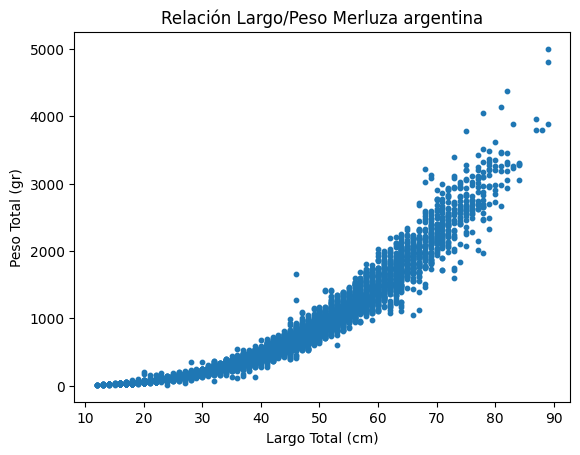

<Figure size 800x600 with 0 Axes>

In [4]:
plt.scatter(datos.LARGO_TOT.values,datos.PESO_TOT.values,s=10)
plt.title("Relación Largo/Peso Merluza argentina")
plt.xlabel("Largo Total (cm)")
plt.ylabel("Peso Total (gr)")
fig=plt.figure(figsize=(8,6))

In [5]:
#DEFINIR LA FUNCION A AJUSTAR
def funcion(x,a,b):
    return a*x**b

#PARA TOTAL DE LOS EJEMPLARES
#REALIZAR EL AJUSTE
param,cov=curve_fit(funcion,datos["LARGO_TOT"],datos["PESO_TOT"])

a_tot,b_tot = param

#CREAR LINEA DE X PARA GRAFICAR LA FUNCION AJUSTADA
x_fit = np.linspace(datos["LARGO_TOT"].min(),datos["LARGO_TOT"].max(),100)
y_fit = funcion(x_fit,a_tot,b_tot)

In [7]:
#CALCULAR R2
# Calcular los valores predichos para los datos reales
y_pred = funcion(datos["LARGO_TOT"], a_tot, b_tot)

# Calcular R2
y_real = datos["PESO_TOT"]
y_mean = np.mean(y_real)

ss_res = np.sum((y_real - y_pred)**2)  # suma de residuos al cuadrado
ss_tot = np.sum((y_real - y_mean)**2)  # suma total

r2 = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinación R²: {r2:.3f}")

Coeficiente de determinación R²: 0.974


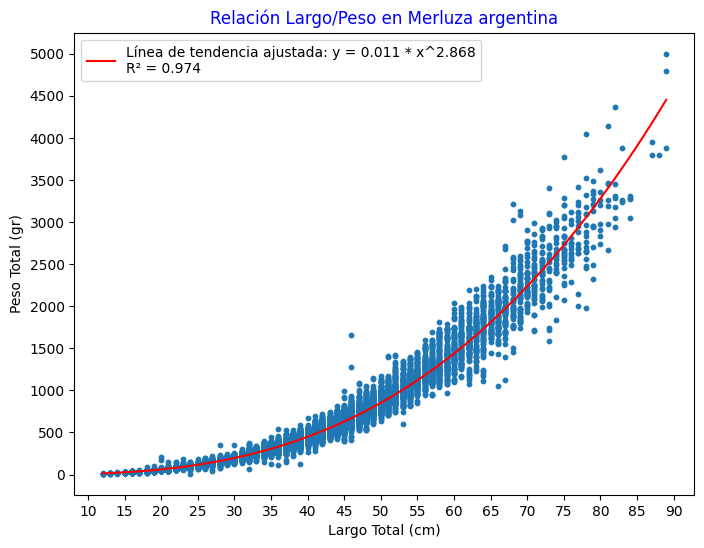

In [8]:
#GRAFICAR LA FUNCION AJUSTADA CON LINEA DE TENDENCIA (LINEA ROJA)
fig=plt.figure(figsize=(8,6))
plt.scatter(datos.LARGO_TOT,datos.PESO_TOT,s=10)
plt.title("Relación Largo/Peso en Merluza argentina", color='blue')
plt.xlabel("Largo Total (cm)")
plt.ylabel("Peso Total (gr)")
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 5001, 500))
plt.plot(x_fit, y_fit, color='red',
         label=f"Línea de tendencia ajustada: y = {a_tot:.3f} * x^{b_tot:.3f}\nR² = {r2:.3f}")

# Agregar la leyenda
plt.legend(loc='upper left')


Mismo DATASET pero dividido en Stock Sur y Norte y por Sexo (MACHOS Y HEMBRAS)

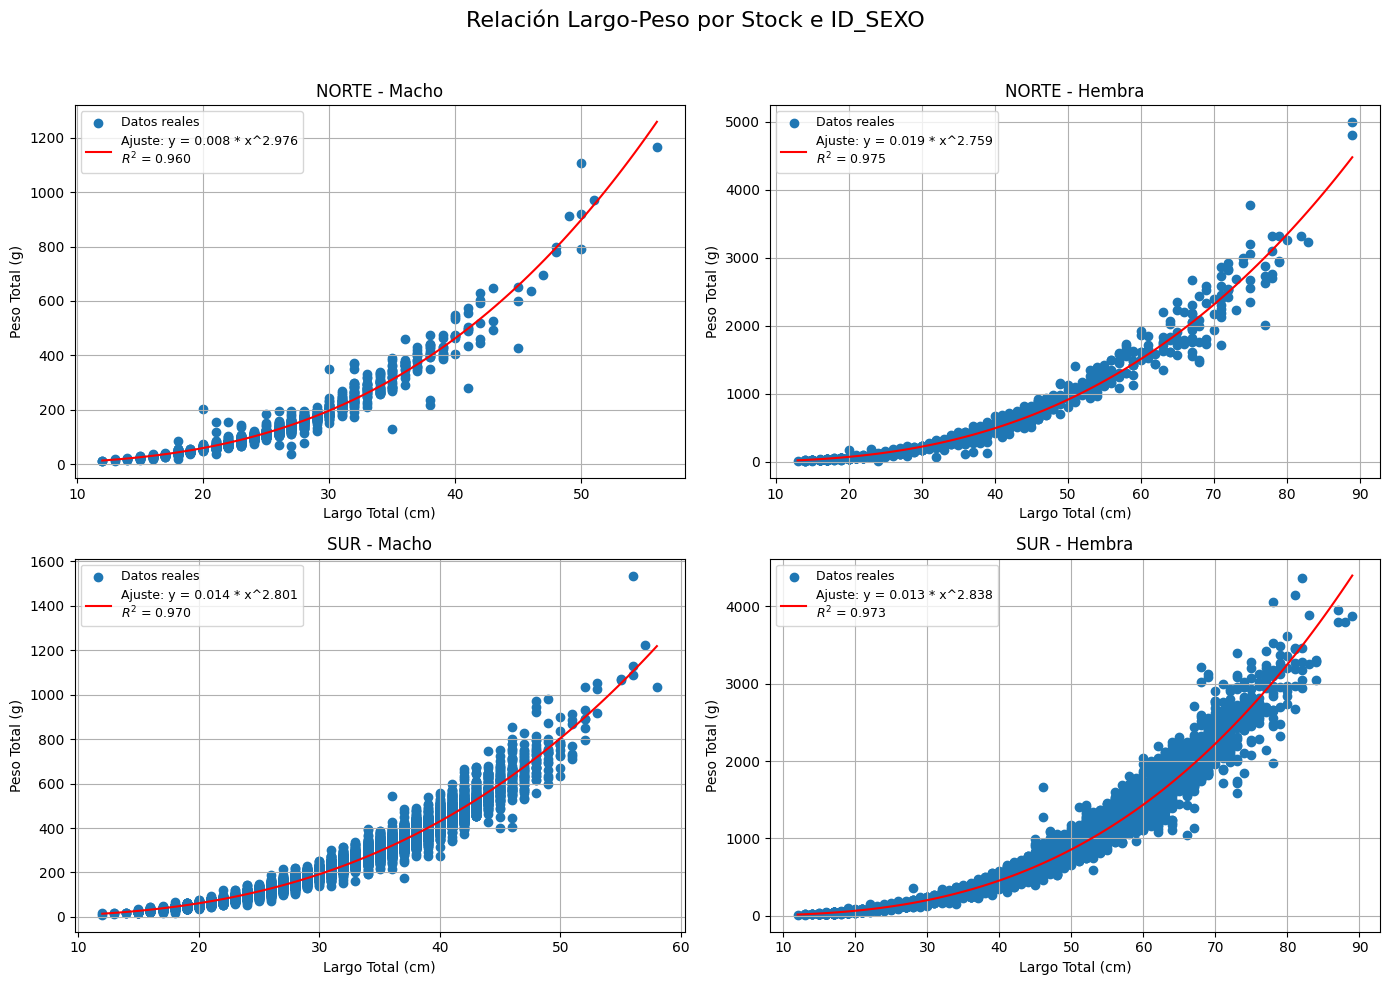

In [9]:
# Definir la función potencial
def funcion(x, a, b):
    return a * x**b

sexo_dict = {1: 'Macho', 2: 'Hembra'}
# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Relación Largo-Peso por Stock e ID_SEXO", fontsize=16)

# Definir las combinaciones de Stock e ID_SEXO
combinaciones = [
    ('NORTE', 1),
    ('NORTE', 2),
    ('SUR', 1),
    ('SUR', 2)
]

# Recorrer cada combinación y hacer su gráfico
for ax, (stock, id_sexo) in zip(axs.flat, combinaciones):
    # Filtrar los datos
    datos_filtrados = datos[(datos['STOCK'] == stock) & (datos['ID_SEXO'] == id_sexo)]

    if not datos_filtrados.empty:
        # Ajuste de curva
        param, _ = curve_fit(funcion, datos_filtrados["LARGO_TOT"], datos_filtrados["PESO_TOT"])
        a, b = param

        # Crear puntos para graficar la curva
        x_fit = np.linspace(datos_filtrados["LARGO_TOT"].min(), datos_filtrados["LARGO_TOT"].max(), 100)
        y_fit = funcion(x_fit, a, b)

        # Calcular R²
        y_pred = funcion(datos_filtrados["LARGO_TOT"], a, b)
        ss_res = np.sum((datos_filtrados["PESO_TOT"] - y_pred) ** 2)
        ss_tot = np.sum((datos_filtrados["PESO_TOT"] - np.mean(datos_filtrados["PESO_TOT"])) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        # Grafico
        ax.scatter(datos_filtrados["LARGO_TOT"], datos_filtrados["PESO_TOT"], label="Datos reales")
        ax.plot(x_fit, y_fit, color='red',
                label=f"Ajuste: y = {a:.3f} * x^{b:.3f}\n$R^2$ = {r2:.3f}")

        ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}", fontsize=12)
        ax.set_xlabel("Largo Total (cm)")
        ax.set_ylabel("Peso Total (g)")
        ax.grid(True)
        ax.legend(fontsize=9)

    else:
        ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}", fontsize=12)
        ax.axis('off')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

ESTADIO GONADAL POR SEXO PARA EL STOCK SUR. Vamos a comprobar si hay mayor cantidad de ejemplares de merluza argentina en desove (estadio 3) en epoca de verano (mayor periodo reproductivo de la especie en el stock sur) que en invierno.

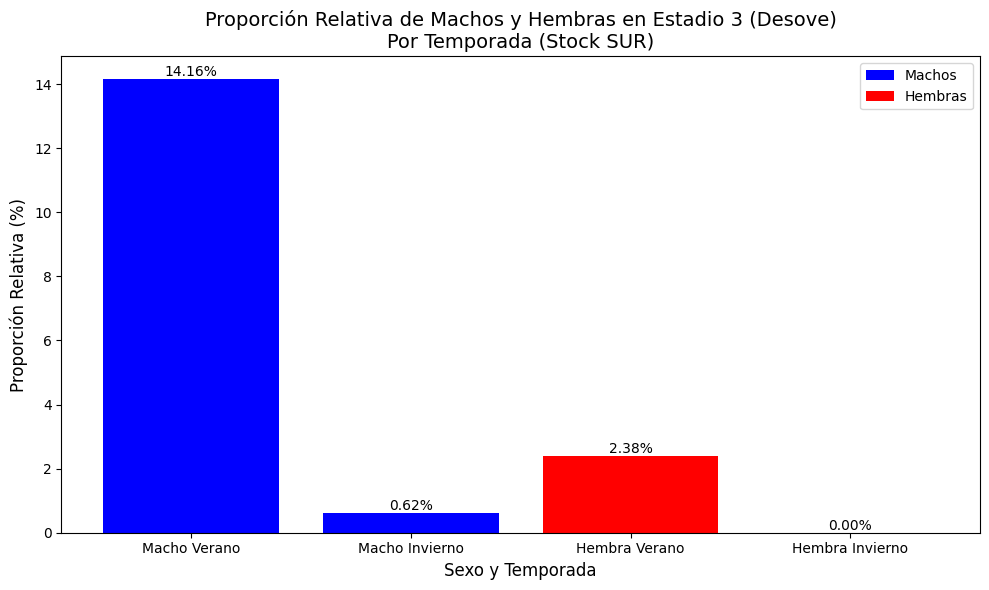

In [10]:
# Filtrar datos del stock SUR y hacer una copia
datos_sur = datos[datos['STOCK'] == 'SUR'].copy()

# Crear TEMPORADA sin warnings
datos_sur['TEMPORADA'] = datos_sur['FECHA'].dt.month.apply(lambda x: 'Verano' if x < 3 else 'Invierno')

# Filtrar estadio 3
datos_sur_estadio3 = datos_sur[datos_sur['ESTADIO_GONADAL'] == 3]

# Contar totales
total_machos_verano = len(datos_sur[(datos_sur['ID_SEXO'] == 1) & (datos_sur['TEMPORADA'] == 'Verano')])
total_hembras_verano = len(datos_sur[(datos_sur['ID_SEXO'] == 2) & (datos_sur['TEMPORADA'] == 'Verano')])

total_machos_invierno = len(datos_sur[(datos_sur['ID_SEXO'] == 1) & (datos_sur['TEMPORADA'] == 'Invierno')])
total_hembras_invierno = len(datos_sur[(datos_sur['ID_SEXO'] == 2) & (datos_sur['TEMPORADA'] == 'Invierno')])

#Contar ejemplares en estadio 3
machos_verano_estadio3 = len(datos_sur_estadio3[(datos_sur_estadio3['ID_SEXO'] == 1) & (datos_sur_estadio3['TEMPORADA'] == 'Verano')])
hembras_verano_estadio3 = len(datos_sur_estadio3[(datos_sur_estadio3['ID_SEXO'] == 2) & (datos_sur_estadio3['TEMPORADA'] == 'Verano')])

machos_invierno_estadio3 = len(datos_sur_estadio3[(datos_sur_estadio3['ID_SEXO'] == 1) & (datos_sur_estadio3['TEMPORADA'] == 'Invierno')])
hembras_invierno_estadio3 = len(datos_sur_estadio3[(datos_sur_estadio3['ID_SEXO'] == 2) & (datos_sur_estadio3['TEMPORADA'] == 'Invierno')])
# Calcular la proporción relativa de machos y hembras en Estadio 3 con respecto al total en cada temporada
rel_machos_verano = (machos_verano_estadio3 / total_machos_verano) * 100
rel_hembras_verano = (hembras_verano_estadio3 / total_hembras_verano) * 100

rel_machos_invierno = (machos_invierno_estadio3 / total_machos_invierno) * 100
rel_hembras_invierno = (hembras_invierno_estadio3 / total_hembras_invierno) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
bar_machos = ax.bar(['Macho Verano', 'Macho Invierno'], [rel_machos_verano, rel_machos_invierno], color='b', label="Machos")
bar_hembras = ax.bar(['Hembra Verano', 'Hembra Invierno'], [rel_hembras_verano, rel_hembras_invierno], color='r', label="Hembras")

# Etiquetas en las barras
for bar in bar_machos:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

for bar in bar_hembras:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Agregar título y etiquetas
ax.set_title('Proporción Relativa de Machos y Hembras en Estadio 3 (Desove)\nPor Temporada (Stock SUR)', fontsize=14)
ax.set_ylabel('Proporción Relativa (%)', fontsize=12)
ax.set_xlabel('Sexo y Temporada', fontsize=12)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede apreciar que en la temporada reproductiva del stock sur (verano), tanto machos como hembras se encuentran en mayor proporcion en desove.

Quiero eliminar mis outliers de mis graficos de scatterplot previos. A continuacion realizo tratamiento

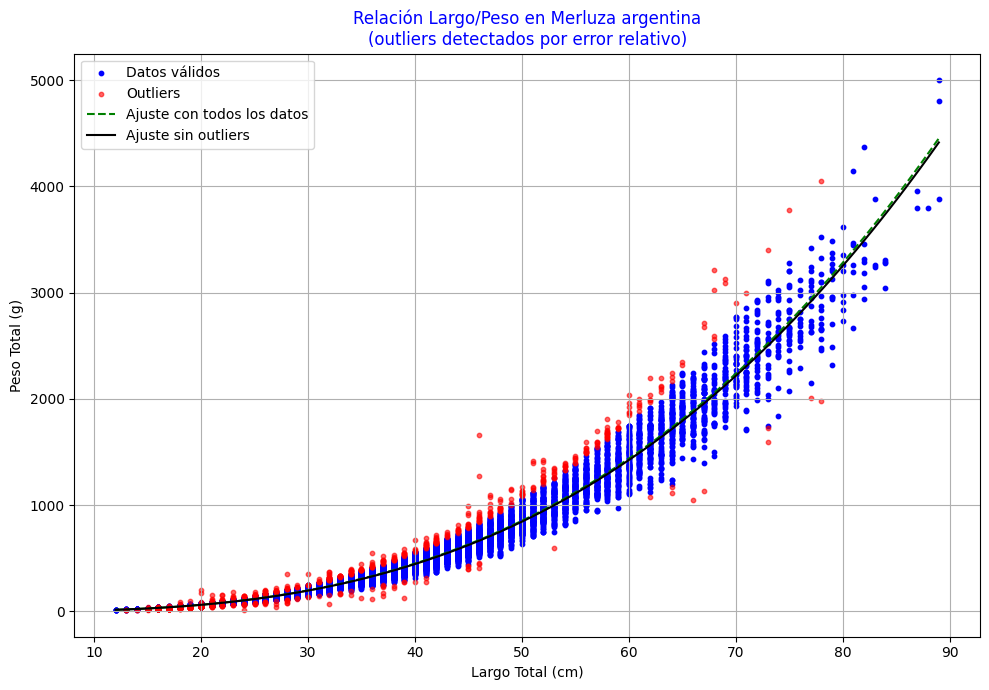

Cantidad total de datos originales: 26283
Cantidad de datos después de eliminar outliers: 25672
Cantidad de datos eliminados como outliers: 611
Porcentaje de datos eliminados: 2.32%


In [11]:
#Función de ajuste
def funcion(x, a, b):
    return a * x**b

#Ajuste inicial (con todos los datos)
param, cov = curve_fit(funcion, datos["LARGO_TOT"], datos["PESO_TOT"])
a_tot, b_tot = param

#Calcular error relativo
y_pred = funcion(datos["LARGO_TOT"], a_tot, b_tot)
error_relativo = (datos["PESO_TOT"] - y_pred) / y_pred

#Definir outliers usando IQR
Q1 = np.percentile(error_relativo, 25)
Q3 = np.percentile(error_relativo, 75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Filtrar datos
filtro = (error_relativo >= limite_inferior) & (error_relativo <= limite_superior)
datos_filtradossinoutliers = datos[filtro]
datos_outliers = datos[~filtro]  # los que quedaron afuera

#Ajuste con datos filtrados
param_filtrado, _ = curve_fit(funcion, datos_filtradossinoutliers["LARGO_TOT"], datos_filtradossinoutliers["PESO_TOT"])
a_filt, b_filt = param_filtrado

#Curvas para graficar
x_fit = np.linspace(datos["LARGO_TOT"].min(), datos["LARGO_TOT"].max(), 100)
y_fit_total = funcion(x_fit, a_tot, b_tot)
y_fit_filtrado = funcion(x_fit, a_filt, b_filt)

#Graficar
fig = plt.figure(figsize=(10,7))
plt.scatter(datos_filtradossinoutliers["LARGO_TOT"], datos_filtradossinoutliers["PESO_TOT"], s=10, label="Datos válidos", color="blue")
plt.scatter(datos_outliers["LARGO_TOT"], datos_outliers["PESO_TOT"], s=10, label="Outliers", color="red", alpha=0.6)
plt.plot(x_fit, y_fit_total, color='green', linestyle='--', label="Ajuste con todos los datos")
plt.plot(x_fit, y_fit_filtrado, color='black', label="Ajuste sin outliers")

plt.title("Relación Largo/Peso en Merluza argentina\n(outliers detectados por error relativo)", color='blue')
plt.xlabel("Largo Total (cm)")
plt.ylabel("Peso Total (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Contar eliminados
n_total = len(datos)
n_filtrados = len(datos_filtradossinoutliers)
n_outliers = len(datos_outliers)

print(f"Cantidad total de datos originales: {n_total}")
print(f"Cantidad de datos después de eliminar outliers: {n_filtrados}")
print(f"Cantidad de datos eliminados como outliers: {n_outliers}")
print(f"Porcentaje de datos eliminados: {n_outliers / n_total * 100:.2f}%")

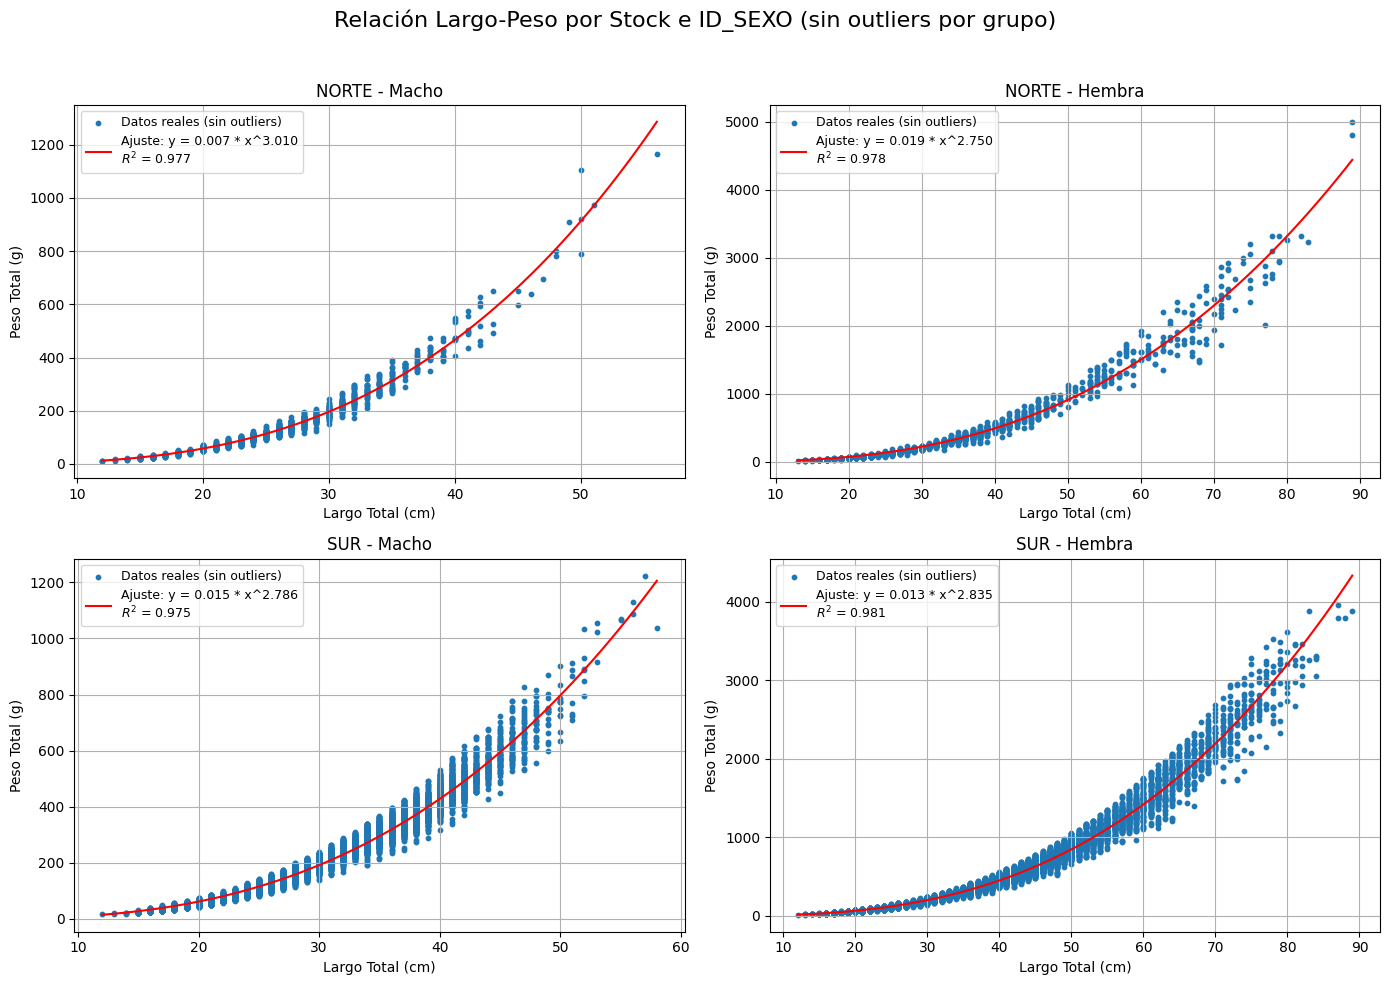

In [12]:
# Definir la función de ajuste
def funcion(x, a, b):
    return a * x**b

# Diccionario de sexo
sexo_dict = {1: 'Macho', 2: 'Hembra'}

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Relación Largo-Peso por Stock e ID_SEXO (sin outliers por grupo)", fontsize=16)

# Definir combinaciones de Stock e ID_SEXO
combinaciones = [
    ('NORTE', 1),
    ('NORTE', 2),
    ('SUR', 1),
    ('SUR', 2)
]

# Recorrer combinaciones
for ax, (stock, id_sexo) in zip(axs.flat, combinaciones):
    # Filtrar datos para el grupo
    datos_grupo = datos[(datos['STOCK'] == stock) & (datos['ID_SEXO'] == id_sexo)]

    if not datos_grupo.empty:
        # Ajuste inicial en el grupo
        param_inicial, _ = curve_fit(funcion, datos_grupo["LARGO_TOT"], datos_grupo["PESO_TOT"])
        a_inicial, b_inicial = param_inicial

        # Calcular error relativo
        y_pred_inicial = funcion(datos_grupo["LARGO_TOT"], a_inicial, b_inicial)
        error_relativo = (datos_grupo["PESO_TOT"] - y_pred_inicial) / y_pred_inicial

        # Definir outliers con IQR dentro del grupo
        Q1 = np.percentile(error_relativo, 25)
        Q3 = np.percentile(error_relativo, 75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar datos válidos (sin outliers)
        filtro = (error_relativo >= limite_inferior) & (error_relativo <= limite_superior)
        datos_filtrados = datos_grupo[filtro]

        # Ahora hacemos el ajuste final con datos sin outliers
        if not datos_filtrados.empty:
            param, _ = curve_fit(funcion, datos_filtrados["LARGO_TOT"], datos_filtrados["PESO_TOT"])
            a, b = param

            # Crear puntos para graficar la curva
            x_fit = np.linspace(datos_filtrados["LARGO_TOT"].min(), datos_filtrados["LARGO_TOT"].max(), 100)
            y_fit = funcion(x_fit, a, b)

            # Calcular R²
            y_pred = funcion(datos_filtrados["LARGO_TOT"], a, b)
            ss_res = np.sum((datos_filtrados["PESO_TOT"] - y_pred) ** 2)
            ss_tot = np.sum((datos_filtrados["PESO_TOT"] - np.mean(datos_filtrados["PESO_TOT"])) ** 2)
            r2 = 1 - (ss_res / ss_tot)

            # Graficar
            ax.scatter(datos_filtrados["LARGO_TOT"], datos_filtrados["PESO_TOT"], label="Datos reales (sin outliers)", s=10)
            ax.plot(x_fit, y_fit, color='red',
                    label=f"Ajuste: y = {a:.3f} * x^{b:.3f}\n$R^2$ = {r2:.3f}")

            ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}", fontsize=12)
            ax.set_xlabel("Largo Total (cm)")
            ax.set_ylabel("Peso Total (g)")
            ax.grid(True)
            ax.legend(fontsize=9)
        else:
            ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}\n(Sin datos luego del filtrado)", fontsize=12)
            ax.axis('off')

    else:
        # No hay datos para este grupo
        ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}\n(Sin datos)", fontsize=12)
        ax.axis('off')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-14-2eb6b87fb959>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_filtradossinoutliers = datos.groupby("clase_largo", group_keys=False).apply(filtrar_sigma)


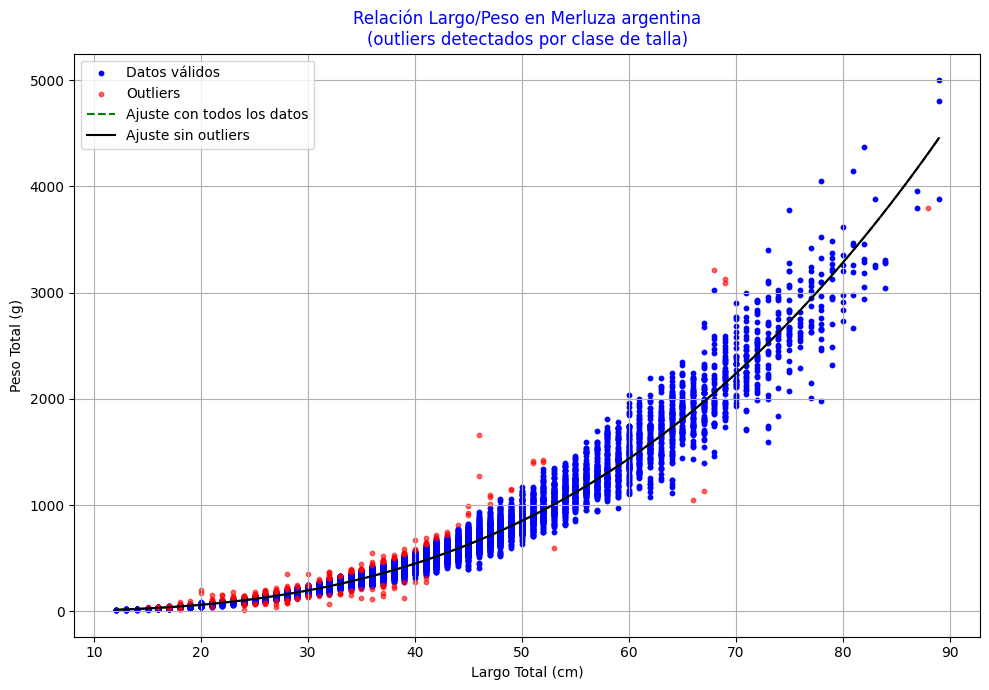

Cantidad total de datos originales: 26283
Cantidad de datos después de eliminar outliers: 26078
Cantidad de datos eliminados como outliers: 205
Porcentaje de datos eliminados: 0.78%


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función de ajuste
def funcion(x, a, b):
    return a * x**b

# Crear columna de clase de largo (redondeada a entero, podés cambiarlo a .floor() o .ceil() si querés)
datos["clase_largo"] = datos["LARGO_TOT"].round()

# Filtrar datos por grupo: eliminar outliers ±2σ en cada clase de largo
def filtrar_sigma(grupo):
    mu = grupo["PESO_TOT"].mean()
    sigma = grupo["PESO_TOT"].std()
    return grupo[(grupo["PESO_TOT"] >= mu - 3*sigma) & (grupo["PESO_TOT"] <= mu + 3*sigma)]

# Aplicar filtro
datos_filtradossinoutliers = datos.groupby("clase_largo", group_keys=False).apply(filtrar_sigma)

# Obtener los datos considerados outliers
datos_outliers = datos[~datos.index.isin(datos_filtradossinoutliers.index)]

# Ajuste con todos los datos (opcional)
param, _ = curve_fit(funcion, datos["LARGO_TOT"], datos["PESO_TOT"])
a_tot, b_tot = param

# Ajuste con datos filtrados
param_filtrado, _ = curve_fit(funcion, datos_filtradossinoutliers["LARGO_TOT"], datos_filtradossinoutliers["PESO_TOT"])
a_filt, b_filt = param_filtrado

# Curvas para graficar
x_fit = np.linspace(datos["LARGO_TOT"].min(), datos["LARGO_TOT"].max(), 100)
y_fit_total = funcion(x_fit, a_tot, b_tot)
y_fit_filtrado = funcion(x_fit, a_filt, b_filt)

# Graficar
fig = plt.figure(figsize=(10,7))
plt.scatter(datos_filtradossinoutliers["LARGO_TOT"], datos_filtradossinoutliers["PESO_TOT"], s=10, label="Datos válidos", color="blue")
plt.scatter(datos_outliers["LARGO_TOT"], datos_outliers["PESO_TOT"], s=10, label="Outliers", color="red", alpha=0.6)
plt.plot(x_fit, y_fit_total, color='green', linestyle='--', label="Ajuste con todos los datos")
plt.plot(x_fit, y_fit_filtrado, color='black', label="Ajuste sin outliers")

plt.title("Relación Largo/Peso en Merluza argentina\n(outliers detectados por clase de talla)", color='blue')
plt.xlabel("Largo Total (cm)")
plt.ylabel("Peso Total (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Contar eliminados
n_total = len(datos)
n_filtrados = len(datos_filtradossinoutliers)
n_outliers = len(datos_outliers)

print(f"Cantidad total de datos originales: {n_total}")
print(f"Cantidad de datos después de eliminar outliers: {n_filtrados}")
print(f"Cantidad de datos eliminados como outliers: {n_outliers}")
print(f"Porcentaje de datos eliminados: {n_outliers / n_total * 100:.2f}%")


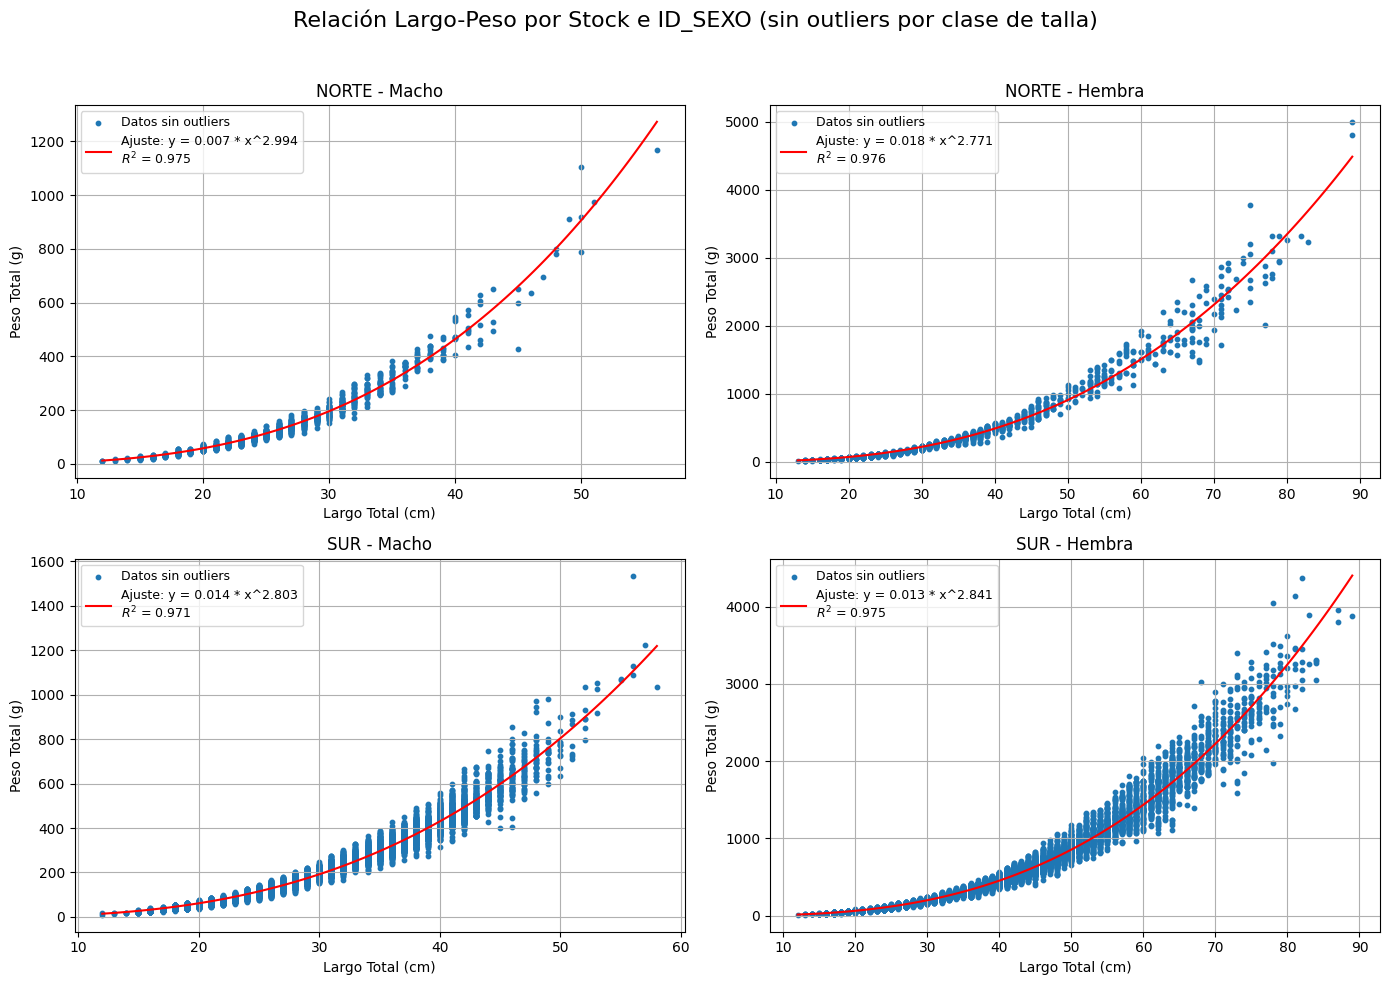

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función de ajuste
def funcion(x, a, b):
    return a * x**b

# Diccionario de sexo
sexo_dict = {1: 'Macho', 2: 'Hembra'}

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Relación Largo-Peso por Stock e ID_SEXO (sin outliers por clase de talla)", fontsize=16)

# Combinaciones de Stock e ID_SEXO
combinaciones = [
    ('NORTE', 1),
    ('NORTE', 2),
    ('SUR', 1),
    ('SUR', 2)
]

# Recorrer combinaciones
for ax, (stock, id_sexo) in zip(axs.flat, combinaciones):
    # Filtrar el grupo desde el DataFrame ya filtrado
    datos_grupo = datos_filtradossinoutliers[
        (datos_filtradossinoutliers['STOCK'] == stock) &
        (datos_filtradossinoutliers['ID_SEXO'] == id_sexo)
    ]

    if not datos_grupo.empty:
        # Ajuste
        param, _ = curve_fit(funcion, datos_grupo["LARGO_TOT"], datos_grupo["PESO_TOT"])
        a, b = param

        # Curva de ajuste
        x_fit = np.linspace(datos_grupo["LARGO_TOT"].min(), datos_grupo["LARGO_TOT"].max(), 100)
        y_fit = funcion(x_fit, a, b)

        # Calcular R²
        y_pred = funcion(datos_grupo["LARGO_TOT"], a, b)
        ss_res = np.sum((datos_grupo["PESO_TOT"] - y_pred) ** 2)
        ss_tot = np.sum((datos_grupo["PESO_TOT"] - np.mean(datos_grupo["PESO_TOT"])) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        # Graficar
        ax.scatter(datos_grupo["LARGO_TOT"], datos_grupo["PESO_TOT"], label="Datos sin outliers", s=10)
        ax.plot(x_fit, y_fit, color='red',
                label=f"Ajuste: y = {a:.3f} * x^{b:.3f}\n$R^2$ = {r2:.3f}")

        ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}", fontsize=12)
        ax.set_xlabel("Largo Total (cm)")
        ax.set_ylabel("Peso Total (g)")
        ax.grid(True)
        ax.legend(fontsize=9)
    else:
        ax.set_title(f"{stock} - {sexo_dict.get(id_sexo, id_sexo)}\n(Sin datos)", fontsize=12)
        ax.axis('off')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
